<h1 style="text-align: center;">Choose a Data Set</h1>
<p>
Use data gathered from one of the following APIs: 
- [TV Series Endpoints from TMDB (you cannot use any of the Movie endpoints!)](https://developer.themoviedb.org/reference/tv-series-airing-today-list)
- [Open Weather](https://openweathermap.org/api)
- [NASA API](https://api.nasa.gov/)
- [API Football](https://www.api-football.com/documentation-v3)
- [RAWG Video Games](https://rawg.io/apidocs)

**OR** 

Pick two or more datasets from one of the following folders: 
- [Olympic Games 2024](https://drive.google.com/drive/folders/1AqsNDn1HjdGBpj6CuxoGrog-Dg6Y_ecO?usp=sharing)
- [Diabetes Indicators](https://drive.google.com/drive/folders/1lXwQOk3oMVZRIDB_DuD8IhMh7rjERsFH?usp=drive_link)
- [Amazon Sales](https://drive.google.com/drive/folders/1VYUZ0vspKZQHgmbhe1qt-mjeeqVJJ58r?usp=drive_link)
- [NBA](https://drive.google.com/drive/folders/1tBGqAJTpXRtmETAjSNyba_kRWGR4JKHt?usp=drive_link)
- [Recipes](https://drive.google.com/drive/folders/18ybwQLoDTHF8EFfNtx9SxKco9Y4m9Z2I?usp=drive_link)
</p>

<h1 style="text-align: center;">My Question</h1>
<h3 style="text-align:center; color: #615a94;">Does the amount of reviews a game get affect the rating?</h3>

<h1 style="text-align: center;">My Answer</h1>

In [1]:
import pandas as pd
import requests
import time

api_key = '416b4b821ed842ce8f81f836f812d269'
endpoint = 'https://api.rawg.io/api/games'

params = {
    'key': api_key,
    'page_size': 50,
    'page': 1
}

all_games = []

for page in range(1, 51):
    params['page'] = page
    response = requests.get(endpoint, params=params)

    if response.status_code == 200:
        gd = response.json()
        games = gd['results']
        
        if not games:
            print(f"No games found on page {page}. Stopping.")
            break
        
        all_games.extend(games)
        print(f"Fetched page {page} with {len(games)} games")
        
        time.sleep(1)
    else:
        print(f"Error fetching page {page}: {response.status_code}")
        break

df = pd.DataFrame(all_games)

print(f"Total games fetched: {len(df)}")
print(df.head())

Fetched page 1 with 40 games
Fetched page 2 with 40 games
Fetched page 3 with 40 games
Fetched page 4 with 40 games
Fetched page 5 with 40 games
Fetched page 6 with 40 games
Fetched page 7 with 40 games
Fetched page 8 with 40 games
Fetched page 9 with 40 games
Fetched page 10 with 40 games
Fetched page 11 with 40 games
Fetched page 12 with 40 games
Fetched page 13 with 40 games
Fetched page 14 with 40 games
Fetched page 15 with 40 games
Fetched page 16 with 40 games
Fetched page 17 with 40 games
Fetched page 18 with 40 games
Fetched page 19 with 40 games
Fetched page 20 with 40 games
Fetched page 21 with 40 games
Fetched page 22 with 40 games
Fetched page 23 with 40 games
Fetched page 24 with 40 games
Fetched page 25 with 40 games
Fetched page 26 with 40 games
Fetched page 27 with 40 games
Fetched page 28 with 40 games
Fetched page 29 with 40 games
Fetched page 30 with 40 games
Fetched page 31 with 40 games
Fetched page 32 with 40 games
Fetched page 33 with 40 games
Fetched page 34 wit

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4000 non-null   int64  
 1   slug                4000 non-null   object 
 2   name                4000 non-null   object 
 3   released            3976 non-null   object 
 4   tba                 4000 non-null   bool   
 5   background_image    3996 non-null   object 
 6   rating              4000 non-null   float64
 7   rating_top          4000 non-null   int64  
 8   ratings             4000 non-null   object 
 9   ratings_count       4000 non-null   int64  
 10  reviews_text_count  4000 non-null   int64  
 11  added               4000 non-null   int64  
 12  added_by_status     4000 non-null   object 
 13  metacritic          2584 non-null   float64
 14  playtime            4000 non-null   int64  
 15  suggestions_count   4000 non-null   int64  
 16  update

In [3]:
df.head()

,id,slug,name,released,tba,background_image,rating,rating_top,ratings,ratings_count,...,dominant_color,platforms,parent_platforms,genres,stores,clip,tags,esrb_rating,short_screenshots,community_rating
0,3498,grand-theft-auto-v,Grand Theft Auto V,2013-09-17,False,https://media.rawg.io/media/games/20a/20aa03a1...,4.47,5,"[{'id': 5, 'title': 'exceptional', 'count': 41...",6940,...,0f0f0f,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action',...","[{'id': 290375, 'store': {'id': 3, 'name': 'Pl...",None,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature'}","[{'id': -1, 'image': 'https://media.rawg.io/me...",NaN
1,3328,the-witcher-3-wild-hunt,The Witcher 3: Wild Hunt,2015-05-18,False,https://media.rawg.io/media/games/618/618c2031...,4.65,5,"[{'id': 5, 'title': 'exceptional', 'count': 52...",6710,...,0f0f0f,"[{'platform': {'id': 186, 'name': 'Xbox Series...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action',...","[{'id': 354780, 'store': {'id': 5, 'name': 'GO...",None,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature'}","[{'id': -1, 'image': 'https://media.rawg.io/me...",NaN
2,4200,portal-2,Portal 2,2011-04-18,False,https://media.rawg.io/media/games/2ba/2bac0e87...,4.60,5,"[{'id': 5, 'title': 'exceptional', 'count': 40...",5758,...,0f0f0f,"[{'platform': {'id': 16, 'name': 'PlayStation ...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 2, 'name': 'Shooter', 'slug': 'shooter...","[{'id': 465889, 'store': {'id': 2, 'name': 'Xb...",None,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 2, 'name': 'Everyone 10+', 'slug': 'eve...","[{'id': -1, 'image': 'https://media.rawg.io/me...",NaN
3,4291,counter-strike-global-offensive,Counter-Strike: Global Offensive,2012-08-21,False,https://media.rawg.io/media/games/736/73619bd3...,3.56,4,"[{'id': 4, 'title': 'recommended', 'count': 16...",3513,...,0f0f0f,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 2, 'name': 'Shooter', 'slug': 'shooter...","[{'id': 4619, 'store': {'id': 3, 'name': 'Play...",None,"[{'id': 40847, 'name': 'Steam Achievements', '...","{'id': 4, 'name': 'Mature', 'slug': 'mature'}","[{'id': -1, 'image': 'https://media.rawg.io/me...",NaN
4,5286,tomb-raider,Tomb Raider (2013),2013-03-05,False,https://media.rawg.io/media/games/021/021c4e21...,4.06,4,"[{'id': 4, 'title': 'recommended', 'count': 23...",3924,...,0f0f0f,"[{'platform': {'id': 18, 'name': 'PlayStation ...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action',...","[{'id': 33824, 'store': {'id': 7, 'name': 'Xbo...",None,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature'}","[{'id': -1, 'image': 'https://media.rawg.io/me...",NaN


Text(0, 0.5, 'Rating')

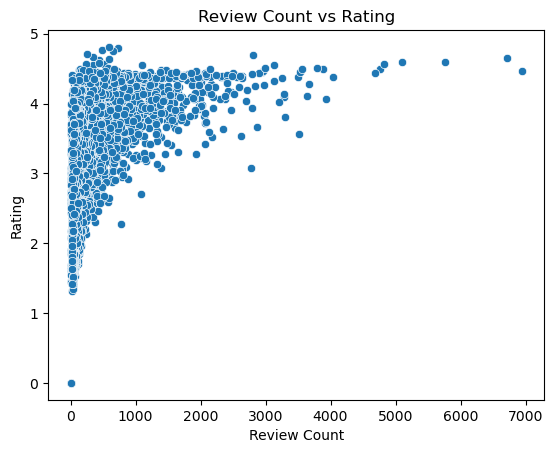

In [4]:
import seaborn as sns

scatter_plot = sns.scatterplot(data=df, x='ratings_count', y='rating')

scatter_plot.set_title("Review Count vs Rating")
scatter_plot.set_xlabel("Review Count")
scatter_plot.set_ylabel("Rating")

<p style="text-align: center; color: #d9a1f8;">The scatterplot seems to have a weak positive correlation. The amount of reviews seem to impact the rating of the game. The more reviews a game has, the more popular it is. The less there is, the more moxed the reviews become. It is reasonal for games without reviews to have a rating of 0 since there is no data.</p>

n (number of data points): 4000
Sum of X (ratings_count): 1311096
Sum of Y (rating): 13445.27
Sum of X * Y: 5054881.74
Sum of X^2: 1568890792
Sum of residuals: -5.684341886080801e-13
   ratings_count  rating  residuals
0           6940    4.47  -2.651914
1           6710    4.65  -2.341105
2           5758    4.60  -1.849671
3           3513    3.56  -1.612863
4           3924    4.06  -1.346613


Text(0, 0.5, 'Residuals')

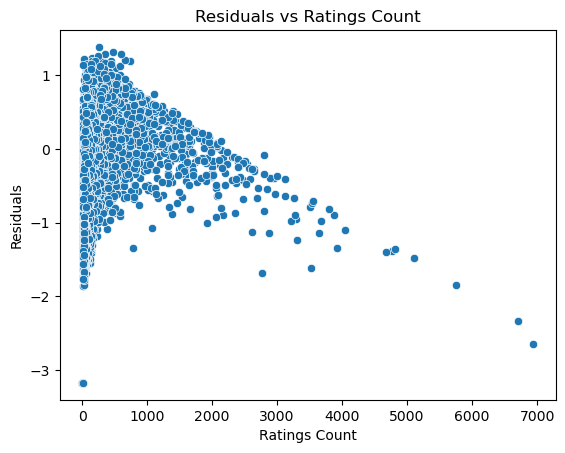

In [5]:
X = df['ratings_count']
y = df['rating']

n = len(X)
sum_x = X.sum() 
sum_y = y.sum()
sum_xy = (X * y).sum()
sum_x2 = (X * X).sum()

print(f"n (number of data points): {n}")
print(f"Sum of X (ratings_count): {sum_x}")
print(f"Sum of Y (rating): {sum_y}")
print(f"Sum of X * Y: {sum_xy}")
print(f"Sum of X^2: {sum_x2}")

m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
b = (sum_y - m * sum_x) / n

y_pred = m * X + b

residuals = y - y_pred

df['residuals'] = residuals

sum_residuals = residuals.sum()

print(f"Sum of residuals: {sum_residuals}")

print(df[['ratings_count', 'rating', 'residuals']].head())

scatter_plot = sns.scatterplot(data=df, x='ratings_count', y='residuals')
scatter_plot.set_title("Residuals vs Ratings Count")
scatter_plot.set_xlabel("Ratings Count")
scatter_plot.set_ylabel("Residuals")

<p style="text-align: center; color: #f1a26b;">The residuals of the ratings appear to have a weak right correlation to the ratings.</p>

<AxesSubplot:xlabel='ratings_count', ylabel='rating'>

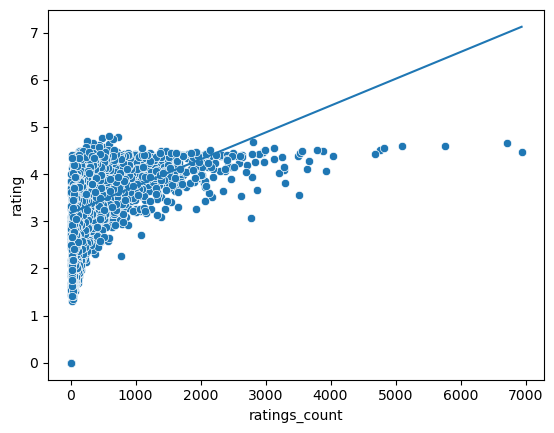

In [11]:
n = len(X)
sum_x = X.sum()
sum_y = y.sum()
sum_xy = (X * y).sum()
sum_x2 = (X * X).sum()

m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
b = (sum_y - m * sum_x) / n

y_pred = m * X + b

sns.scatterplot(data=df, x='ratings_count', y='rating')
sns.lineplot(x=X, y=y_pred)

<p style="text-align: center; color: #635b9b;">The line on the linear regression model shows the model has a strong right correlation, but the dots on the scatterplot seem to cluster together before moving out in a straight line to the right. The outliers may be bringing down the linear regression line. With all the dots overlapping each other, it might also be hiding how many more games have been rated over 3 stars.</p>

<p style="text-align: center; color: #3367CD;">There is a weak positive correlation between the amount of views a game recieves and its rating. Games with more reviews have higher ratings, as they are more popular, while games with less reviews tend to be less popular, though show that they have more mixed ratings. The linear regression model suggest a trend, but the outliers may be changing the output, making harder to visualize a comprehensible pattern.
Overall, the amount of the ratings seem to only somewhat affect the the average rating of the games.</p>